

# Project: TMDB  data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this analysis, we are going to use TMDB movie data. This data set contains information about 10,000 movies collected from The Movie Database.
The data has 21 columns. However, the columns relevant for our analysis are as under: 


1. popularity - This factor tells which film is getting the maximum attention and viewership from audience
2. title - this is the title of the movie.Another unique feature
3. cast - this tells the people who worked in the movie
4. director - name of the director
5. runtime - this is movie's length in minutes
6. genres - this tells all the genres that movie can be classified as
7. production_companies - it's the name of production houses that have financed the movie
8. release_date - this is date on which the movie is released
9. vote_count - Number of people who have rated the movie 
10. vote_avg - the avg rating of the movie
11. release_year - year of release
12. revenue_adj,13. budget_adj- The two columns show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time


### Question(s) for Analysis

1. How popularity, runtime, revenue is trending over time? 
2. What time of the year are majority movies released?
3. What are the characterstics of most popular movies?Are popular movies also among the top rated movies?What is the correlation between popularity and rating?
4. What is the impact of rating on ROI?
5. List of directors whose movies generate above avg revenue?
6. List of directors whose movies are highly rated
7. What are the most revenue generating genres? Which are the most popular genres? 
8. Which movies generated high return on investment(ROI)?
9. Do higher budget movies generate more revenue?
10. Production houses that are producing more popular movies than others



>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore. 

In [1]:
#Import ncessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Explore the metadata 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Wrangling
### Data Cleaning

#### Let's find how many unique IDs are there.

In [4]:
df.id.nunique()

10865

There are 10865 unique Ids which is one less than the total number of records in the data.Since Ids for each movie should be unique.Lets explore this more to find if there is dupliacte record.

In [5]:
duplicate_rows = df[df.id.duplicated(keep=False)]
duplicate_rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


It can be seen from the above result that there is indeed a duplicate row.Let's dedupe the data.

In [6]:
df.drop_duplicates(inplace=True)

Check if duplicate records are removed

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date          10

Yes, the duplicated row is removed as seen from the above information.Now, we will remove extraneous columns from this data

In [8]:
df.drop(['id','imdb_id','budget','revenue','homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [9]:
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Lets check null values, datatype of each column and change it if required

we can see there are missing values in the column cast,director,genres and production companies.
However, these columns will be used in answering few questions.Lets first answer the questions which are not using these columns.

Fixing column datatypes

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

/var/folders/w0/nbsnlqqd60s_jl5jwcqh9d7r0000gn/T/ipykernel_74688/1525507706.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


checking the new column data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   original_title        10865 non-null  object        
 2   cast                  10789 non-null  object        
 3   director              10821 non-null  object        
 4   runtime               10865 non-null  int64         
 5   genres                10842 non-null  object        
 6   production_companies  9835 non-null   object        
 7   release_date          10865 non-null  datetime64[ns]
 8   vote_count            10865 non-null  int64         
 9   vote_average          10865 non-null  float64       
 10  release_year          10865 non-null  int64         
 11  budget_adj            10865 non-null  float64       
 12  revenue_adj           10865 non-null  float64       
dtypes: datetime64[ns](1),

We can observe that both revenue and budget are expressed in exponential terms, we will convert it into integer

In [12]:
columns = ['budget_adj','revenue_adj']
decimal_x = lambda x: int(float(x))
for c in columns:
             df[c] = df[c].apply(decimal_x)

In [13]:
#checking if budget and revenue values are in better format
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801


In [14]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.00,10865.00,10865,10865.00,10865.00,10865.00,10865.00,10865.00
mean,0.65,102.07,2006-06-06 00:03:10.851357440,217.40,5.98,2001.32,17549893.81,51369001.54
min,0.00,0.00,1973-01-01 00:00:00,10.00,1.50,1960.00,0.00,0.00
25%,0.21,90.00,1997-10-17 00:00:00,17.00,5.40,1995.00,0.00,0.00
50%,0.38,99.00,2007-04-26 00:00:00,38.00,6.00,2006.00,0.00,0.00
75%,0.71,111.00,2012-09-03 00:00:00,146.00,6.60,2011.00,20853251.00,33701729.00
max,32.99,900.00,2072-12-19 00:00:00,9767.00,9.20,2015.00,425000000.00,2827123750.00
std,1.00,31.38,NaN,575.64,0.94,12.81,34307526.53,144638333.03


In [15]:
df.sort_values(by='vote_average', ascending=False).head(5)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.01,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,2011-09-03,14,9.20,2011,0,0
538,0.11,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,2015-01-01,11,8.90,2015,0,0
1200,0.13,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,41,8.80,2014,0,0
2269,0.22,Life Cycles,NaN,Derek Frankowski,47,Documentary,NaN,2010-10-02,27,8.80,2010,0,0
6911,0.21,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,2006-07-09,23,8.70,2006,0,0


From the above description, we observe that a lot of values are zero in budget and revenue columns, we need to find these values and treat them

In [16]:
df_mRev = df.query('revenue_adj == 0')
df_mRev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6016 entries, 48 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            6016 non-null   float64       
 1   original_title        6016 non-null   object        
 2   cast                  5945 non-null   object        
 3   director              5973 non-null   object        
 4   runtime               6016 non-null   int64         
 5   genres                5993 non-null   object        
 6   production_companies  5082 non-null   object        
 7   release_date          6016 non-null   datetime64[ns]
 8   vote_count            6016 non-null   int64         
 9   vote_average          6016 non-null   float64       
 10  release_year          6016 non-null   int64         
 11  budget_adj            6016 non-null   int64         
 12  revenue_adj           6016 non-null   int64         
dtypes: datetime64[ns](1),

In [17]:
df_mBud = df.query('budget_adj == 0')
df_mBud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 30 to 10864
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            5698 non-null   float64       
 1   original_title        5698 non-null   object        
 2   cast                  5633 non-null   object        
 3   director              5658 non-null   object        
 4   runtime               5698 non-null   int64         
 5   genres                5676 non-null   object        
 6   production_companies  4804 non-null   object        
 7   release_date          5698 non-null   datetime64[ns]
 8   vote_count            5698 non-null   int64         
 9   vote_average          5698 non-null   float64       
 10  release_year          5698 non-null   int64         
 11  budget_adj            5698 non-null   int64         
 12  revenue_adj           5698 non-null   int64         
dtypes: datetime64[ns](1),

There are total 6016 records that have revenue value as zero.It is 55.37% of total rows, hence we cannot drop these rows as that would lead to inaccurate analysis.
We first replace it with Nan and then interpolate the missing values.We will do that for both revenue and budget as budget column also has 5698 values as zero, which is 52% of the total records and cannot be dropped.
Also, let's check if there are any values in the budget column that are too low of a cost for making a movie.

In [18]:
df.loc[(df['budget_adj'] < 50000) , 'budget_adj'] = 0

In [19]:
#Function to replace zeros with Nan's and then interpolate Nan's with interpolated values

def replace_null(column,values):
    for v in values:
        df[column] = df[column].replace(v, np.nan)
    df[column].interpolate(inplace=True)

In [20]:
# Use the function to treat zeros in revenue column
replace_null('revenue_adj',[0,0.00])

In [21]:
# Use the function to treat zeros in budget column
replace_null('budget_adj',[0,0.00])

In [22]:
df.sort_values(by='budget_adj', ascending=True)['budget_adj'].head(3)

7685   52583.00
9419   52836.00
6486   55828.00
Name: budget_adj, dtype: float64

Now, we will check if there are any zeros or null values in the revenue column and budget column

In [23]:
df.query('revenue_adj == 0')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [24]:
df.query('budget_adj == 0')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


## Exploratory Data Analysis

### 1. How Popularity, runtime, revenue are trending over time?

In [25]:
# function to plot trend line

def draw_trend(df,var,title,xlabel,ylabel):
    fig, ax = plt.subplots(figsize = (17,9))
    df.groupby('release_year')[var].mean().plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

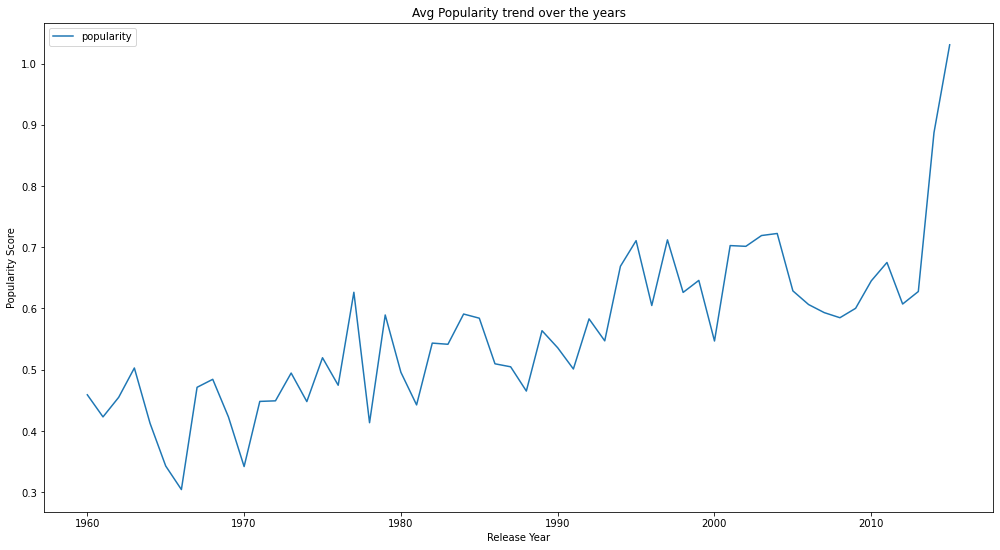

In [26]:
draw_trend(df,'popularity',"Avg Popularity trend over the years",'Release Year','Popularity Score')

From the above trend line, we can conclude that avg popularity score is increasing over the years.This could be due to emergence of social media and promotion campaigns taken by production houses for their films.

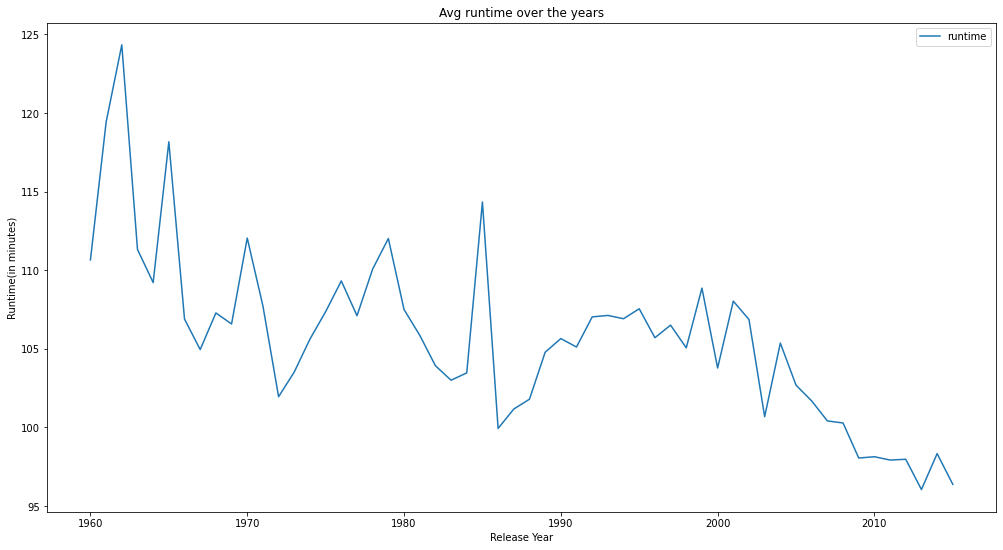

In [27]:
# Next, we find the runtime trend over the years

draw_trend(df,'runtime','Avg runtime over the years','Release Year','Runtime(in minutes)')

From this trend line, we can say that there is a significant reduction in avg runtime over the years, where avg runtime is above 100 minutes from 1960 to 2005, post which, it started to come down.Hoeever, overall trend is downwards.

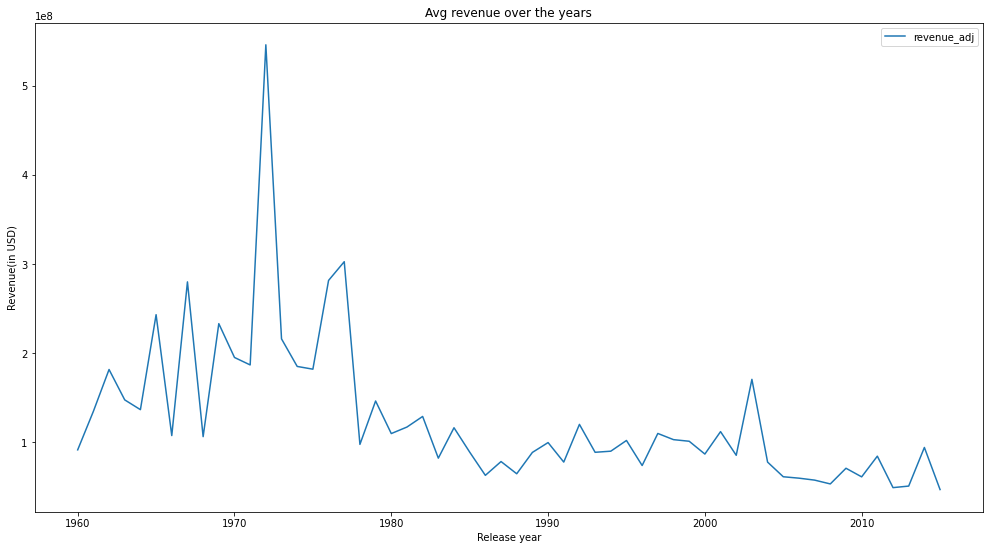

In [28]:
# Next we draw trend line for avg revenue
draw_trend(df,'revenue_adj','Avg revenue over the years','Release year','Revenue(in USD)')

The trendline for revenues is highly fluctuating over a span of first 20 years i.e. from 1960 to 1980, where we observe a lot of spikes and dips.Post which it started to plateu.The same could be due to introduction of other sources of entertainment like VCR, Cable TV and Video Games in the 1980s and then CDs, DVDs and Internet in the 1990s.

### 2. What time(month(s) of the year are majority movies released?

Create a new column where month of release is mentioned.

In [29]:
df['month'] = df['release_date'].dt.month
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5
2,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.00,271619025.00,3
3,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.00,1902723129.00,12
4,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.00,1385748801.00,4


In [30]:
df_grouped = df.groupby(['release_year', 'month']).size().reset_index(name='count')
df_grouped.head()

,release_year,month,count
0,1960,1,2
1,1960,2,2
2,1960,3,2
3,1960,4,1
4,1960,5,2


In [31]:
df_grouped.describe()

,release_year,month,count
count,660.00,660.00,660.00
mean,1987.90,6.54,16.46
std,16.04,3.45,17.08
min,1960.00,1.00,1.00
25%,1974.00,4.00,4.00
50%,1988.00,7.00,10.00
75%,2002.00,10.00,22.00
max,2015.00,12.00,98.00


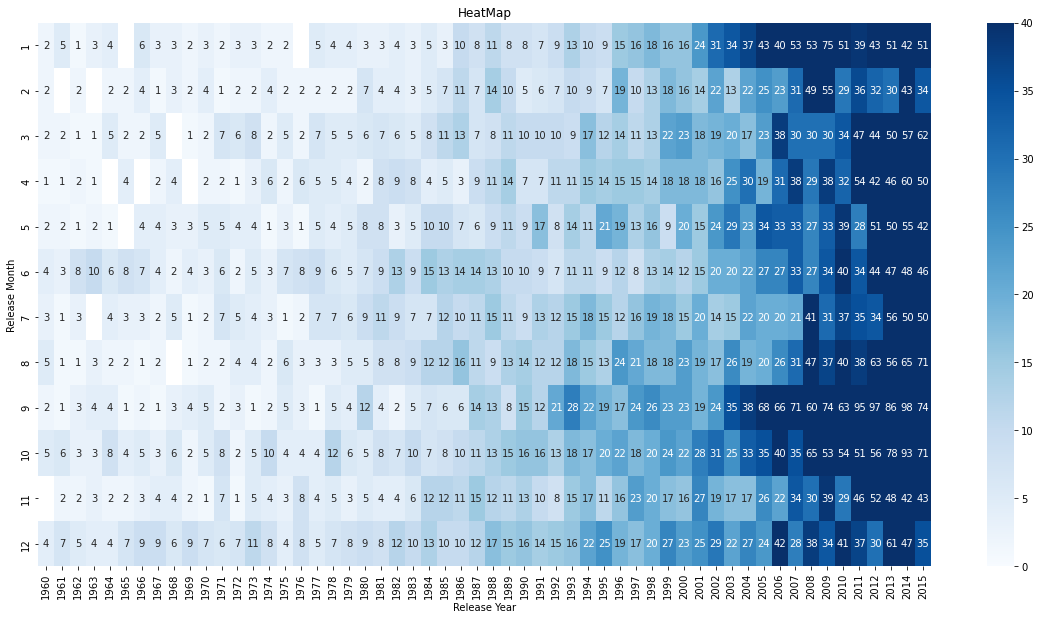

In [32]:
fig, ax = plt.subplots(figsize = (20,10))

pivot_table = df_grouped.pivot(index='month', columns='release_year', values='count')
heatmap = sns.heatmap(pivot_table, annot=True, cmap='Blues', ax=ax,vmin=0, vmax=40)
heatmap.set_title('HeatMap')
heatmap.set_xlabel('Release Year')
heatmap.set_ylabel('Release Month')
plt.show()


It can be seen from the above analysis that september is the month, when most movies are released.
and the least number of movies gets released in the month of February.

### 3. What are the characterstics of most popular movies? And how it compares to high rated movies?

In [33]:
# defining a function to return top 25% records based on popularity score
def top_3quartile(df,col):
    q75 = df[col].quantile(0.75)
    df1 = df[df[col] > q75]
    return df1

In [34]:
# Descriptive stats of records with popularity score more than third quartile
top_3quartile(df,'popularity').describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,2716.00,2716.00,2716,2716.00,2716.00,2716.00,2716.00,2716.00,2716.00
mean,1.66,108.39,2006-01-20 15:07:41.266568448,712.99,6.28,2003.23,52780015.69,182568343.41,7.08
min,0.71,0.00,1973-04-19 00:00:00,10.00,3.30,1960.00,80261.00,63.00,1.00
25%,0.90,95.00,1999-06-03 00:00:00,174.00,5.80,1998.00,18720667.00,40090457.25,4.00
50%,1.18,105.00,2007-07-12 12:00:00,367.00,6.30,2006.00,37020013.00,102908899.50,7.00
75%,1.82,119.00,2012-09-08 06:00:00,810.00,6.80,2012.00,72712560.50,226506497.75,10.00
max,32.99,540.00,2072-07-30 00:00:00,9767.00,8.40,2015.00,368371256.00,2827123750.00,12.00
std,1.60,23.89,NaN,976.95,0.79,11.14,47758513.43,244399303.96,3.34


The minimum runtime is zero which is not possible.Lets find out which movie has this runtime.

In [35]:
most_pop = top_3quartile(df,'popularity')
most_pop.query('runtime == 0')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
92,1.88,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.40,2015,27599987.00,177342812.00,12


Only, one record has it.On actually checking the runtime of this movie from imdb, it is 93 minutes. We can populate this value 

In [36]:
most_pop.loc[most_pop['original_title'] == 'Mythica: The Necromancer', 'runtime'] = 93

In [37]:
most_pop.describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,2716.00,2716.00,2716,2716.00,2716.00,2716.00,2716.00,2716.00,2716.00
mean,1.66,108.42,2006-01-20 15:07:41.266568448,712.99,6.28,2003.23,52780015.69,182568343.41,7.08
min,0.71,3.00,1973-04-19 00:00:00,10.00,3.30,1960.00,80261.00,63.00,1.00
25%,0.90,95.00,1999-06-03 00:00:00,174.00,5.80,1998.00,18720667.00,40090457.25,4.00
50%,1.18,105.00,2007-07-12 12:00:00,367.00,6.30,2006.00,37020013.00,102908899.50,7.00
75%,1.82,119.00,2012-09-08 06:00:00,810.00,6.80,2012.00,72712560.50,226506497.75,10.00
max,32.99,540.00,2072-07-30 00:00:00,9767.00,8.40,2015.00,368371256.00,2827123750.00,12.00
std,1.60,23.80,NaN,976.95,0.79,11.14,47758513.43,244399303.96,3.34


We have filtered the top 25 % of the records based on popularity score.The highest pop score being 32.98 and mean score being 1.66. These movies have an avg runtime of 108.42 minutes. Avg rating for these movies is 6.28.Maximum rating is 8.4.However, for all records, maximum rating was 9.2 Now lets find out top 20 movies based on popularity and check if these are also top rated movies?

In [38]:
top_20 = most_pop.sort_values(by='popularity', ascending=False).head(20)
top_20.head(5)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5
629,24.95,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.00,2014,151980023.00,572690645.00,11
630,14.31,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.90,2014,156585478.00,712291130.00,7
2,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.00,271619025.00,3


In [39]:
top_20.describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,20.00,20.00,20,20.00,20.00,20.00,20.00,20.00,20.00
mean,13.14,135.65,2010-12-26 12:00:00,5081.75,7.33,2010.35,140429413.30,952378310.45,8.15
min,8.47,101.00,1977-03-20 00:00:00,2480.00,5.80,1977.00,18421821.00,72526614.00,3.00
25%,9.07,121.00,2010-05-21 00:00:00,3470.00,7.07,2009.75,114984384.25,469074454.00,5.75
50%,10.46,136.00,2014-10-30 00:00:00,4860.00,7.40,2014.00,147289980.00,702521960.00,8.50
75%,13.01,149.00,2015-04-11 12:00:00,6105.50,7.90,2015.00,163699980.75,1151247039.00,11.25
max,32.99,178.00,2015-12-25 00:00:00,9767.00,8.10,2015.00,240886902.00,2827123750.00,12.00
std,7.07,20.79,NaN,2094.64,0.65,9.12,54369203.55,777399831.17,3.41


From above descriptive stats about the top 20 popular movies, we can deduce that their avg runtime is 136 minutes.
and avg rating is 7.33. Now lets find top 25% movies and top 20 movies based on ratings(vote_average) and find out how they are different from popular movies 

In [40]:
top_rated = top_3quartile(df,'vote_average')
top_rated.describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,2578.00,2578.00,2578,2578.00,2578.00,2578.00,2578.00,2578.00,2578.00
mean,0.93,107.41,2007-04-13 16:23:38.774243584,439.95,7.13,1999.89,29641634.13,128124549.37,7.27
min,0.00,0.00,1973-01-01 00:00:00,10.00,6.70,1960.00,59843.00,2.00,1.00
25%,0.20,91.00,1996-08-31 18:00:00,21.00,6.80,1992.00,6132245.17,5108064.64,4.00
50%,0.44,105.00,2007-08-17 00:00:00,66.00,7.00,2005.00,15832182.33,32152559.62,8.00
75%,1.00,121.00,2013-05-04 06:00:00,353.00,7.30,2011.00,36365877.75,129132144.06,10.00
max,28.42,900.00,2072-12-13 00:00:00,9767.00,9.20,2015.00,342600000.00,2827123750.00,12.00
std,1.54,48.74,NaN,964.35,0.38,14.30,38515473.36,261934772.54,3.44


The minimum runtime is zero which is not possible.Lets find out which movie has this runtime.

In [41]:
top_rated.query('runtime == 0')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
2315,0.17,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,NaN,0,Drama|Music|Romance,NaN,2010-08-14,29,7.30,2010,11466666.67,587857.00,8
4138,0.04,A Time for Dancing,Larisa Oleynik|Shiri Appleby|Peter Coyote|Patr...,Peter Gilbert,0,Drama|Music,NaN,2002-09-06,14,7.50,2002,15304799.25,37055935.33,9
5216,0.07,Madea's Class Reunion,Tyler Perry|Chandra Currelley|Cheryl Pepsii Ri...,Tyler Perry,0,Comedy|Music,NaN,2003-06-25,12,6.90,2003,107411623.78,803803543.41,6


There are three records that show runtime as zero.We can find out their runtime from imdb website and populate the values

In [42]:
def replace_runtime(title,minutes):
    top_rated.loc[top_rated.original_title == title, 'runtime'] = minutes

In [43]:
runtimes = {"Listen to Your Heart": 102,"A Time for Dancing": 100,"Madea's Class Reunion": 120}
for title, minutes in runtimes.items():
    replace_runtime(title,minutes)

Now, let's see the descriptive stats of the top(25%) rated movies

In [44]:
top_rated.describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,2578.00,2578.00,2578,2578.00,2578.00,2578.00,2578.00,2578.00,2578.00
mean,0.93,107.54,2007-04-13 16:23:38.774243584,439.95,7.13,1999.89,29641634.13,128124549.37,7.27
min,0.00,2.00,1973-01-01 00:00:00,10.00,6.70,1960.00,59843.00,2.00,1.00
25%,0.20,91.00,1996-08-31 18:00:00,21.00,6.80,1992.00,6132245.17,5108064.64,4.00
50%,0.44,105.00,2007-08-17 00:00:00,66.00,7.00,2005.00,15832182.33,32152559.62,8.00
75%,1.00,121.00,2013-05-04 06:00:00,353.00,7.30,2011.00,36365877.75,129132144.06,10.00
max,28.42,900.00,2072-12-13 00:00:00,9767.00,9.20,2015.00,342600000.00,2827123750.00,12.00
std,1.54,48.60,NaN,964.35,0.38,14.30,38515473.36,261934772.54,3.44


Finding out movies that are very popular and also top rated

In [45]:
merged_df = pd.merge(most_pop, top_rated, on='original_title', how='inner')
merged_df.head()

,popularity_x,original_title,cast_x,director_x,runtime_x,genres_x,production_companies_x,release_date_x,vote_count_x,vote_average_x,...,runtime_y,genres_y,production_companies_y,release_date_y,vote_count_y,vote_average_y,release_year_y,budget_adj_y,revenue_adj_y,month_y
0,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5
1,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.00,1902723129.00,12
2,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.00,1385748801.00,4
3,9.11,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.20,...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.20,2015,124199945.00,490314247.00,12
4,7.67,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.60,...,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.60,2015,99359956.00,547749654.00,9


Top rated movie is rated 9.2 and avg rating is 7.13 which is higher than that of most pop movies (6.28).Avg runtime of top rated movies is 107.33 which is almost equal to that of most popular movies.Let's find top 20 movies based on ratings

In [46]:
topRated_20 = top_rated.sort_values(by='vote_average', ascending=False).head(20)
topRated_20.head(5)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
3894,0.01,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,2011-09-03,14,9.20,2011,96344.20,467692846.45,9
538,0.11,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,2015-01-01,11,8.90,2015,2729331.36,470395.62,1
2269,0.22,Life Cycles,NaN,Derek Frankowski,47,Documentary,NaN,2010-10-02,27,8.80,2010,2763875.00,89726.50,10
1200,0.13,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,41,8.80,2014,4476502.00,15600721.63,12
6911,0.21,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,2006-07-09,23,8.70,2006,5949179.75,7916974.33,7


In [47]:
topRated_20.describe()

,popularity,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
count,20.00,20.00,20,20.00,20.00,20.00,20.00,20.00,20.00
mean,0.50,152.40,2005-07-24 19:12:00,310.30,8.56,2005.00,13263812.21,57114813.37,7.35
min,0.00,30.00,1981-11-24 00:00:00,10.00,8.40,1981.00,96344.20,15332.50,1.00
25%,0.05,70.75,1998-11-05 12:00:00,11.00,8.40,1998.75,3307606.93,450637.81,5.75
50%,0.15,113.00,2010-07-15 00:00:00,16.50,8.50,2010.00,7213478.76,13085814.23,8.50
75%,0.23,149.50,2012-03-18 18:00:00,30.50,8.62,2011.50,17280029.81,29726576.74,10.00
max,7.19,900.00,2015-02-08 00:00:00,5754.00,9.20,2015.00,43167434.00,467692846.45,12.00
std,1.58,184.74,NaN,1281.43,0.22,10.34,13421578.33,128045927.50,3.65


Above descriptive stats for top 20 movies based on highest ratings indicates that avg runtime is 152 minutes and avg rating is 8.56 the same is 136 minutes. and 7.33 for 20 most popular movies.Now, we will find the common movies between the two data sets

In [48]:
merged_df = pd.merge(top_20, topRated_20, on='original_title', how='inner')
merged_df

,popularity_x,original_title,cast_x,director_x,runtime_x,genres_x,production_companies_x,release_date_x,vote_count_x,vote_average_x,...,runtime_y,genres_y,production_companies_y,release_date_y,vote_count_y,vote_average_y,release_year_y,budget_adj_y,revenue_adj_y,month_y


There are no common movies in the top 20 values of datasets.Let's find out correlation between the popularity score and ratings of overall data.

In [49]:
def cor_coef(x,y):
    r = x.corr(y)
    return r

# Create scatter plot with line of best fit
def plot_graph(x,y,x_label,y_label):
    plt.scatter(x, y)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.title('Correlation: ' + str(cor_coef(x,y)))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

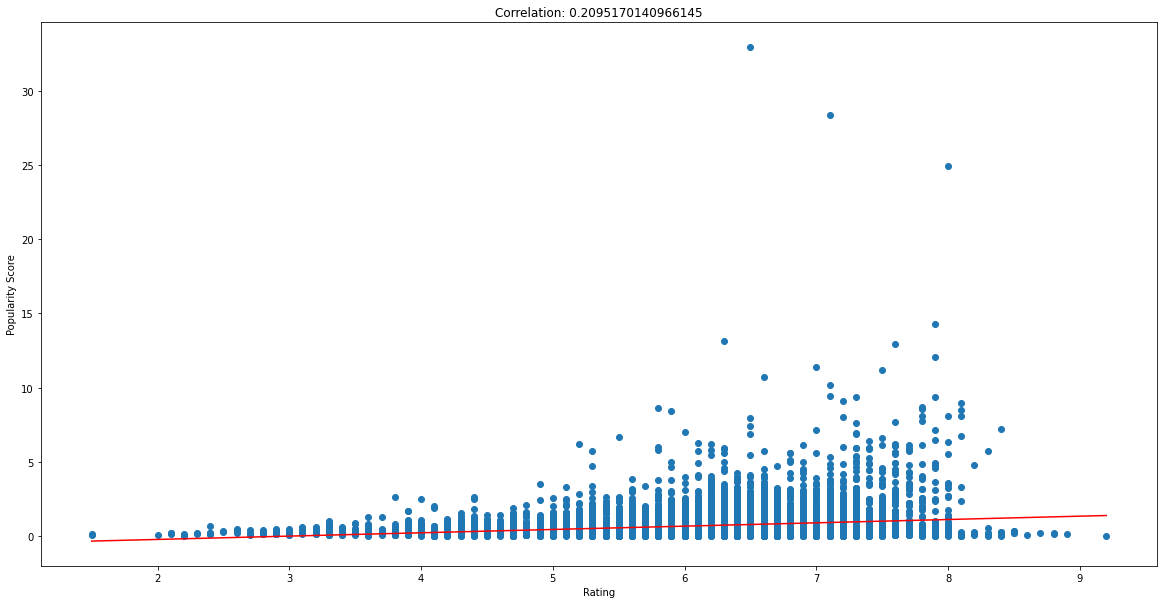

In [50]:
fig, ax = plt.subplots(figsize = (20,10))
plot_graph(df['vote_average'],df['popularity'],'Rating','Popularity Score')

The above graph and value of correlation coeeficient suggest that there is weak or no correlation between the two variables.Let's observe the correlation between popularity and Revenue

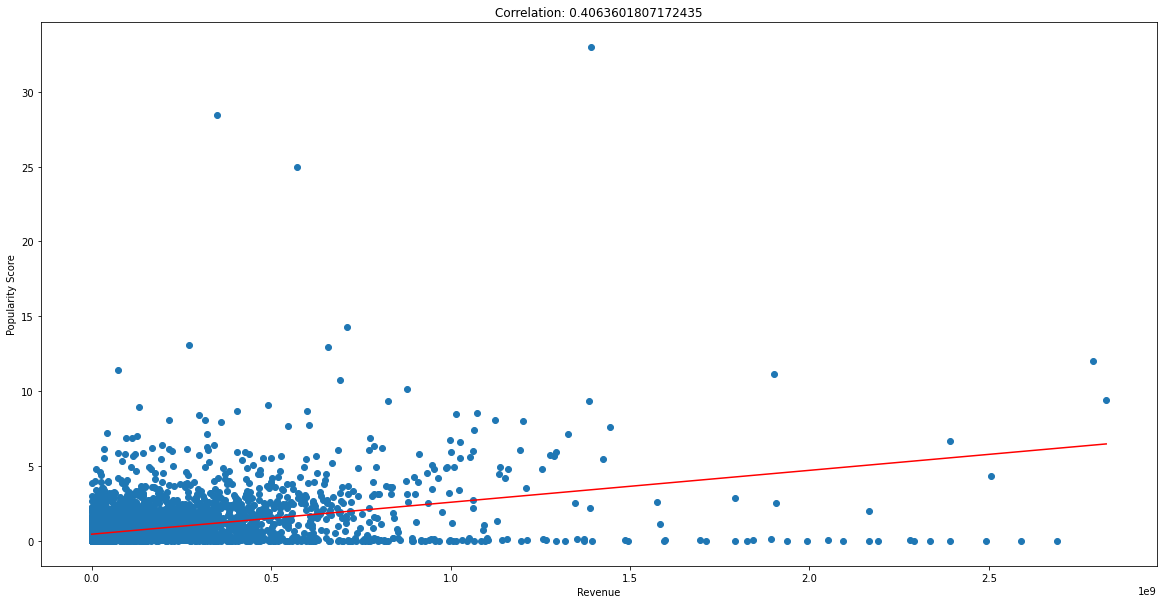

In [51]:
fig, ax = plt.subplots(figsize = (20,10))
plot_graph(df['revenue_adj'],df['popularity'],'Revenue','Popularity Score')

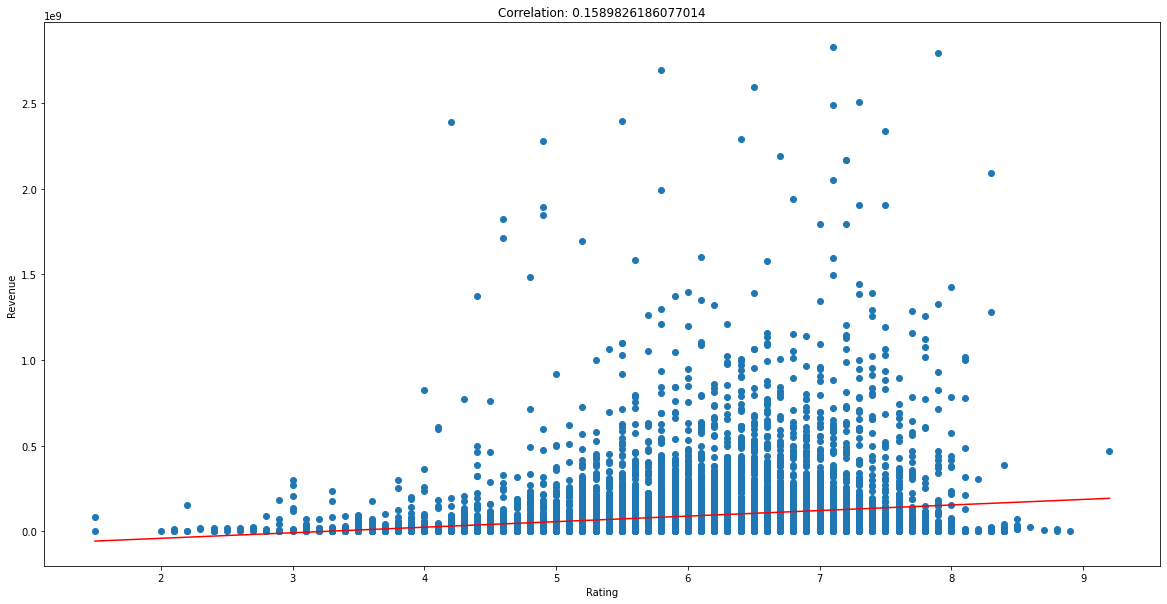

In [52]:
fig, ax = plt.subplots(figsize = (20,10))
plot_graph(df['vote_average'],df['revenue_adj'],'Rating','Revenue')

From the above graph and coefficient of correlation, it can be infered that there is no correlation between popularity and revenue and between rating and revenue.
This finding is based on an assumption that the values of revenue are accurate.
The limitation here is that we have more than 50% rows missing value of revenue, hence we have interploated those values.
However, as we can see majority movies are rated between 6 and 8.

### 4. What is the impact of rating on ROI?

To answer this, first we need to calculate the Return on Investment.Which can be done using the formula - (Profit/Cost)*100

In [53]:
df['ROI'] = ((df['revenue_adj'] - df['budget_adj'])/df['budget_adj'])*100
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,ROI
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5,152.29
2,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.00,271619025.00,3,168.40
3,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.00,1902723129.00,12,934.09
4,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.00,1385748801.00,4,692.76


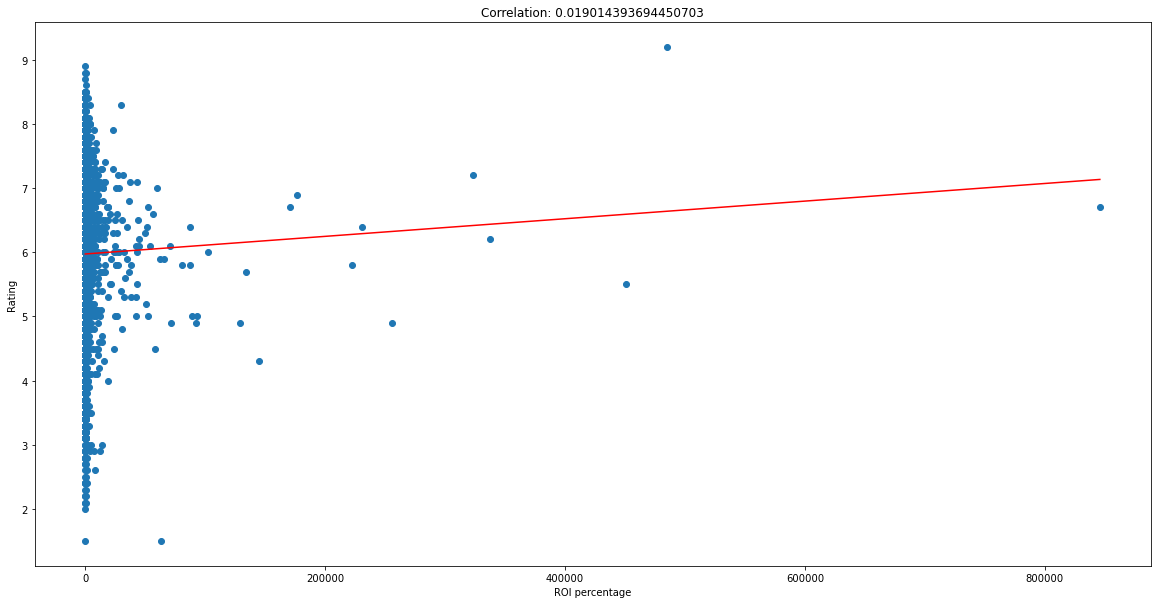

In [54]:
fig, ax = plt.subplots(figsize = (20,10))
plot_graph(df['ROI'],df['vote_average'],'ROI percentage','Rating')

There is no correlation between ROI and ratings

### 5. List of directors whose movies generate above avg revenue?

In [55]:
df_dir = df.query("revenue_adj > revenue_adj.mean()")
df_dir.head().director

0     Colin Trevorrow
1       George Miller
2    Robert Schwentke
3         J.J. Abrams
4           James Wan
Name: director, dtype: object

In [56]:
df_dir.director.nunique()

1309

In [57]:
df.director.nunique()

5067

In [58]:
df_dir.director.value_counts().head(14)

director
Steven Spielberg    26
Clint Eastwood      18
Martin Scorsese     15
Ron Howard          14
Robert Zemeckis     14
Tim Burton          12
Ridley Scott        12
Mike Nichols        12
Sydney Pollack      11
Tony Scott          11
Richard Donner      10
Chris Columbus      10
David Fincher       10
Michael Bay         10
Name: count, dtype: int64

Out of 5056 directors,there are 1308 directors(25.9%) whose movies generated above average revenue.List of Directors who directed 10 or more movies in these years is shown above. 

### 6. List of directors whose movies are highly rated

In [59]:
df_dir_rated = df.query('vote_average > vote_average.mean()')
df_dir_rated.head().director

0     Colin Trevorrow
1       George Miller
2    Robert Schwentke
3         J.J. Abrams
4           James Wan
Name: director, dtype: object

In [60]:
df_dir_rated.director.nunique()

3008

Are there any directors whose movies generated above avg revenues as well as whose movies are highly rated?

To answer this question we need to merge the two dataframes to find common directors

In [61]:
df_dir.rename(columns=lambda x: x + "_rev", inplace = True)

/var/folders/w0/nbsnlqqd60s_jl5jwcqh9d7r0000gn/T/ipykernel_74688/3889526701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dir.rename(columns=lambda x: x + "_rev", inplace = True)


In [62]:
df_dir.head()

,popularity_rev,original_title_rev,cast_rev,director_rev,runtime_rev,genres_rev,production_companies_rev,release_date_rev,vote_count_rev,vote_average_rev,release_year_rev,budget_adj_rev,revenue_adj_rev,month_rev,ROI_rev
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5,152.29
2,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.00,271619025.00,3,168.40
3,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.00,1902723129.00,12,934.09
4,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.00,1385748801.00,4,692.76


In [63]:
merged_df = df_dir.merge(df_dir_rated,left_on='director_rev', right_on='director', how='inner')
merged_df.director.value_counts().head(20)

director
Steven Spielberg     650
Clint Eastwood       468
Martin Scorsese      390
Woody Allen          315
Ron Howard           252
Ridley Scott         228
Robert Zemeckis      210
Tim Burton           192
Mike Nichols         168
Steven Soderbergh    144
Tony Scott           143
Sidney Lumet         135
Richard Donner       130
Sydney Pollack       110
Chris Columbus       110
Peter Jackson        104
Brian De Palma       104
David Fincher        100
Michael Bay          100
Joel Schumacher       96
Name: count, dtype: int64

Yes there are top 20 directors that are common in both data sets.WE can conclude that directors whose movies are highly rated are also generating high revenues.

### 7.What are the most revenue generating genres?

In [64]:
# Drop rows where genres is null and check if rows with null genres value are dropped

df.dropna(subset=['genres'],inplace=True)
df.genres.isnull().sum()

0

In [65]:
df.head(5)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,ROI
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5,152.29
2,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.00,271619025.00,3,168.40
3,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.00,1902723129.00,12,934.09
4,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.00,1385748801.00,4,692.76


As observed above, genres column contains multiple genres and need to be exploded in separate rows in order to use it for answering the above question

In [66]:
df['genres'] = df['genres'].apply(lambda x : x.split('|'))
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,ROI
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5,152.29
2,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955.00,271619025.00,3,168.40
3,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919.00,1902723129.00,12,934.09
4,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923.00,1385748801.00,4,692.76


In [67]:
df = df.explode('genres')
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,ROI
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.00,348161292.00,5,152.29


In [68]:
grouped_R = df.groupby('genres',axis=0).revenue_adj.mean()
grouped_R.sort_values(axis=0, ascending=False)

genres
Adventure         169478587.90
Fantasy           142728420.10
Animation         134887801.88
Family            129498787.68
Science Fiction   123769355.75
Action            121120951.76
Western           114904755.39
War               103098665.04
Music              85702660.60
Crime              85231198.74
Comedy             83834002.64
Documentary        83055289.07
Romance            81279552.11
Mystery            80482475.02
Thriller           79486604.02
History            77028817.36
Foreign            74785941.28
Drama              73532955.37
Horror             60266620.13
TV Movie           48710903.53
Name: revenue_adj, dtype: float64

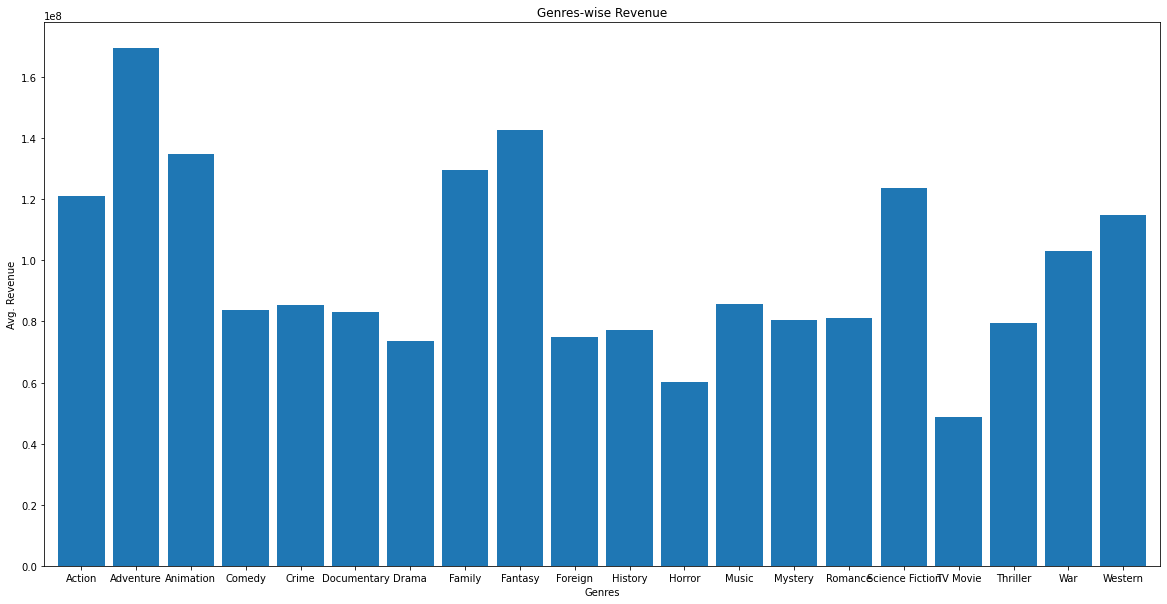

In [80]:
plt.subplots(figsize=(20, 10))
grouped_R.plot.bar(rot=0,width=0.85)
plt.title('Genres-wise Revenue')
plt.xlabel('Genres')
plt.ylabel('Avg. Revenue')
plt.show();

We grouped the data by genres and found the average revenue per genre to observe that top 5 highest revenue generating genres are - 
1. Adventure
2. Fantasy
3. Animation
4. Family
5. Science Fiction

Now, we answer the second part of this question, i.e.  which genres are popular

In [70]:
grouped_P = df.groupby('genres',axis=0).popularity.mean()
grouped_P.sort_values(axis=0, ascending=False)

genres
Adventure         1.15
Science Fiction   1.00
Fantasy           0.99
Action            0.93
Animation         0.85
Family            0.79
Crime             0.74
Thriller          0.74
War               0.73
Mystery           0.69
Comedy            0.59
Romance           0.59
Drama             0.59
Western           0.59
History           0.58
Music             0.49
Horror            0.47
TV Movie          0.27
Foreign           0.19
Documentary       0.18
Name: popularity, dtype: float64

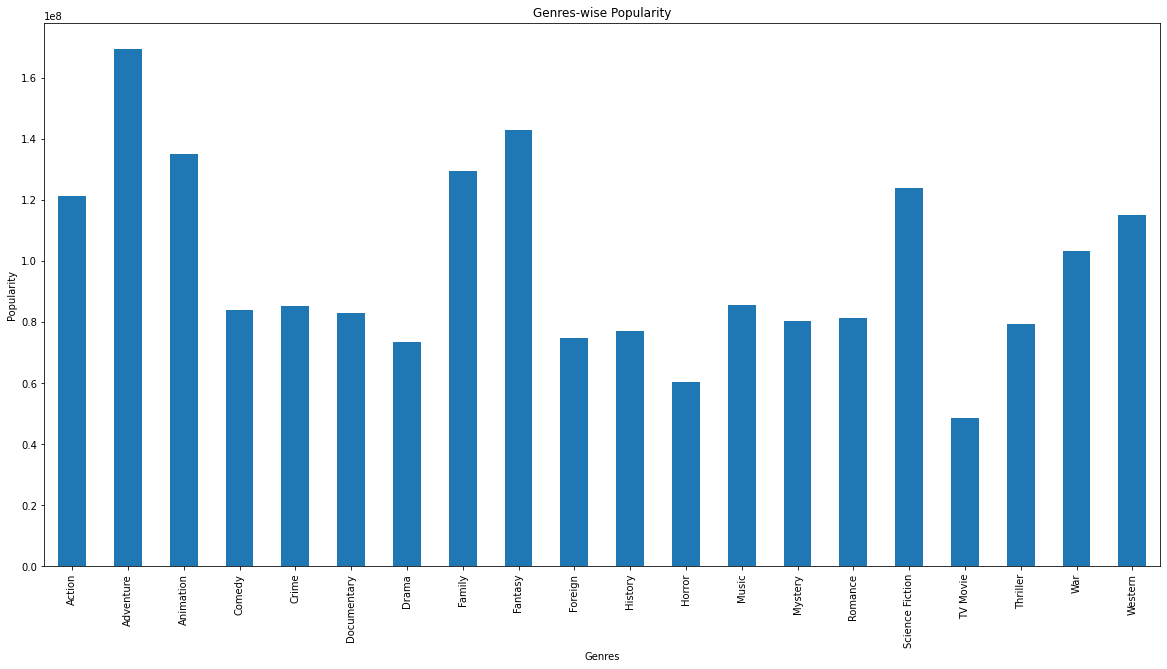

In [71]:
plt.subplots(figsize=(20, 10))
grouped_R.plot.bar()
plt.title('Genres-wise Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.show();

Based on above results, we can conclude that the most revenue generating generes are also the most popular genres.Let's confirm this by finding the correlation coefficient 

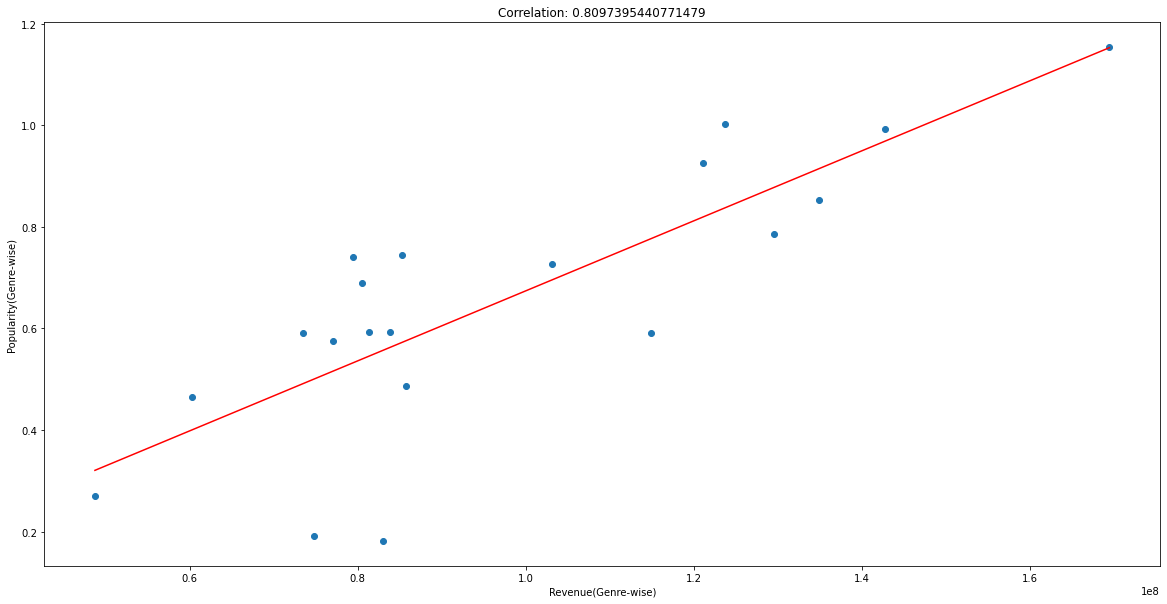

In [72]:
fig, ax = plt.subplots(figsize = (20,10))
plot_graph(grouped_R,grouped_P,'Revenue(Genre-wise)','Popularity(Genre-wise)')

As observed above, there is a strong correlation between Genre-wise Revenue and Genre-wise Popularity suggesting that most popular genres are also the most revenue generating genres.

### 8.Which movies generated high return on investment(ROI)?

In [73]:
df.sort_values(by = 'ROI',ascending=False).head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,ROI
3895,0.03,Blinkyâ„¢,Max Records|Jenni Fontana|James Nardini|Caroli...,Ruairi Robinson,13,Science Fiction,NaN,2011-03-21,21,6.70,2011,59843.00,506234588.07,3,845837.85
3895,0.03,Blinkyâ„¢,Max Records|Jenni Fontana|James Nardini|Caroli...,Ruairi Robinson,13,Horror,NaN,2011-03-21,21,6.70,2011,59843.00,506234588.07,3,845837.85
3894,0.01,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,2011-09-03,14,9.20,2011,96344.20,467692846.45,9,485339.55
2874,0.00,Slashers,Tony Curtis Blondell,Maurice Devereaux,99,Comedy,NaN,2001-01-01,11,5.50,2001,203195.00,916878043.90,1,451130.61
2874,0.00,Slashers,Tony Curtis Blondell,Maurice Devereaux,99,Horror,NaN,2001-01-01,11,5.50,2001,203195.00,916878043.90,1,451130.61


### 9. Do higher budget movies generate more revenue?

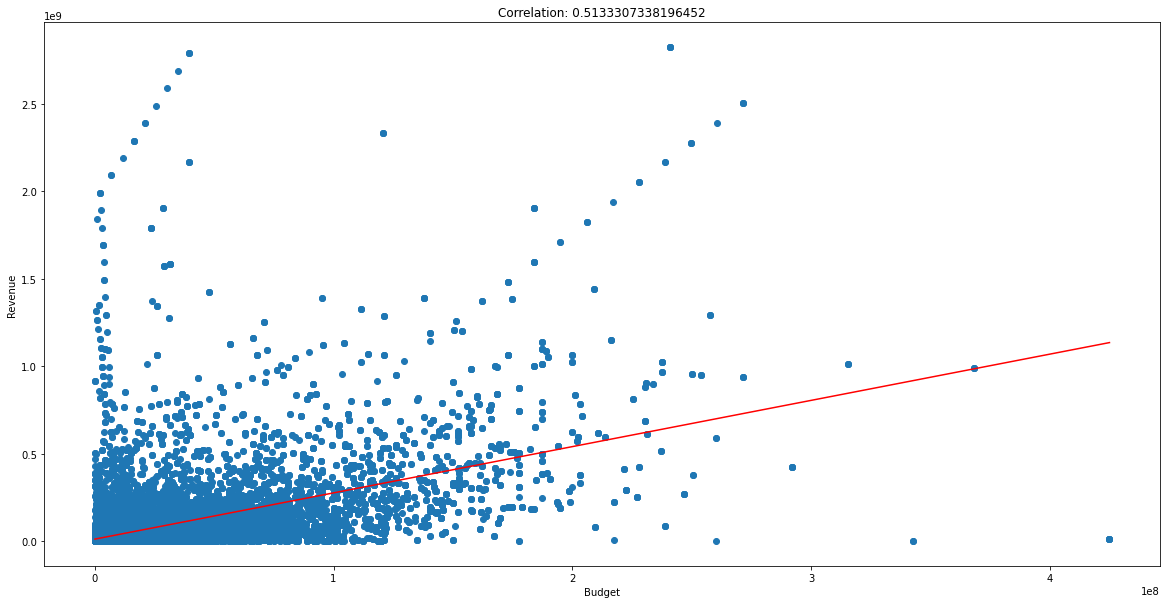

In [74]:
fig, ax = plt.subplots(figsize = (20,10))
plot_graph(df['budget_adj'],df['revenue_adj'],'Budget','Revenue')

There is a positive correlation between budget and revenue, we can say that high budget movies generally do better in terms of generating revenues

### 10. Production houses that are financing more popular movies than others

For this we need to first drop all the rows with null values in production house column.

In [75]:
df.dropna(subset=['production_companies'],inplace=True)
df.production_companies.isnull().sum()

0

In [76]:
df['production_companies'] = df['production_companies'].apply(lambda x : x.split('|'))
df = df.explode('production_companies')
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,ROI
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Amblin Entertainment,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Legendary Pictures,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Fuji Television Network,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Dentsu,2015-06-09,5562,6.50,2015,137999939.00,1392445892.00,6,909.02


In [77]:
group_P = df.groupby('production_companies',axis=0).popularity.mean()
group_P.sort_values(axis=0, ascending=False).head(20)

production_companies
Fuji Television Network            14.94
Bulletproof Cupid                  14.31
DefyNite Films                     11.42
Truenorth Productions              11.17
3Foot7                             10.17
Atman Entertainment                 8.95
Linson Films                        8.95
Bristol Automotive                  8.11
CatchPlay                           7.40
Dayday Films                        7.14
UW4 Productions                     7.03
Syncopy                             6.97
M Productions                       6.91
Le Grisbi Productions               6.91
Underworld Produktions GmbH         6.89
Subterranean Productions LLC        6.89
Subterranean Productions UK Ltd.    6.89
Lynda Obst Productions              6.86
Revolution Sun Studios              6.53
Sketch Films                        6.27
Name: popularity, dtype: float64

<a id='conclusions'></a>
## Conclusions

> The exploratory data analysis suggests a lot of insights about the TMDB dataset. Brief Summary and key takeaways are as under:
 1. Popularity score is increasing over time due to digitalisation and social media
 2. Avg runtime of movies has reduced over the years, this could be due to short attention span, easy distribution and boxoffice success - shorter movies can run more number of times, increasing the revenues
 3. Most movies are released in the month of September, and the least number of movies gets released in the month of February.This could be due to Competition - where studios release movies during the time when there are no big releases or Movie Festival Season where they can create a buzz and get critical acclaim.
 4. Most popular movies have an avg runtime of 108.42 minutes and their avg rating is 6.28.There is no correlation between popularity and rating, popularity and revenue, ratings and revenue, which suggests that even movies not generating good revenue are rated high and movies which are less popular and yet generating high revenues.Also, top rated movies are not the most popular one.This could be due to the fact that popularity is calculated considering factors other than ratings, like Mentions and tags, Media coverage,critical acclaim,fanbase. 
 5. Directors, whose movies are highly rated also generate high revenues.
 6. Most revenue generating genres are Adventure,Fantasy,Animation,Family and Science Fiction.These are also the most popular genres
 7. High budget movies are generating high revenues in general.
 
 Limitations :
 
 Missing value: More than 50% data for revenue and budget is missing and we have used interpolation method to replace the nan values, the results and finding using these columns could be not completely accurate or may result in baised values.
 
 Scope : The missing values could be generated using machine learning algorithms.However, that is beyond the scope of this project.
 